In [1]:
#https://blog.quantinsti.com/linear-regression-models-scikit-learn/#dataset-scikit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from matplotlib import pyplot

from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#https://github.com/justmarkham/scikit-learn-videos/blob/master/10_categorical_features.ipynb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [2]:
#Get the training data
TrainingData = pd.read_csv("CE802_P3_Data.csv")
#Get the testing data
TestingData = pd.read_csv("CE802_P3_Test.csv")


In [3]:
TrainingData

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,UK,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12,Very low,280.78,11.44,-4.77,52.05,171.46,6,0.00
1,Europe,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15,Very high,0.02,7.78,-6.82,26.49,119.34,4,1073.28
2,UK,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24,Medium,16.32,8.14,-0.91,26.97,15.96,7,1203.67
3,USA,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18,High,1.08,2.28,-8.12,35.34,176.32,1,789.66
4,Europe,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9,Low,134.62,13.82,-5.92,31.47,117.94,4,2093.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,UK,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3,Low,18.42,9.20,-12.87,35.25,175.56,1,0.00
1496,UK,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9,Very low,1.54,20.24,0.82,53.55,142.92,3,2853.23
1497,UK,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15,Low,25.62,1.06,-9.41,30.60,114.14,5,1629.55
1498,Europe,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12,Very low,0.10,1.58,2.33,42.78,160.06,3,261.47


In [4]:
TestingData

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,Rest,-1241.58,-132.64,-1706.31,35524.89,5.17,96.82,-3.08,12,Low,0.32,10.92,-0.83,15.60,193.70,3,NaN
1,Europe,-132.09,-113.12,-850.02,39549.27,4.27,30.16,-6.88,15,Very high,1.54,6.72,-10.07,22.41,238.70,3,NaN
2,USA,95.10,-101.95,-1719.48,-2724.33,4.69,125.88,-3.10,12,High,0.00,16.56,-7.42,23.25,149.26,2,NaN
3,USA,2067.24,-118.41,-3986.37,32421.45,5.21,79.06,-11.68,12,High,8.32,17.92,1.38,27.42,310.32,3,NaN
4,Rest,-2080.44,-47.43,-1509.36,24896.07,6.37,69.80,-10.97,9,High,0.38,15.92,-6.15,23.22,241.56,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,USA,-937.56,-114.26,-2626.62,10978.71,3.52,92.24,-7.87,18,Medium,0.60,10.34,2.44,32.37,190.64,6,NaN
1496,Rest,-476.82,-69.66,-2757.24,1481.61,1.51,-94.08,-2.89,12,Medium,12.90,17.42,0.91,30.12,220.88,6,NaN
1497,USA,-790.95,-59.32,-1853.31,3666.00,3.35,41.54,-12.10,15,Medium,36.96,6.26,-3.36,39.39,167.80,4,NaN
1498,UK,-1316.28,-86.89,-3527.10,15709.71,16.53,-10.22,-7.79,15,High,14.16,14.96,5.31,9.06,63.18,3,NaN


In [5]:
#Get the training data's features
X = TrainingData.drop('Target',axis=1)
#Get the training data's "Target" values
y = TrainingData['Target']

In [6]:
#Get the test data's features
X_test = TestingData.drop('Target',axis=1)
#Get the testing data's "Target" values
y_test = TestingData['Target']

In [7]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X[['F1']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [8]:
ohe.categories_

[array(['Europe', 'Rest', 'UK', 'USA'], dtype=object)]

In [9]:
ohe.fit_transform(X[['F10']])

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [10]:
ohe.categories_

[array(['High', 'Low', 'Medium', 'Very high', 'Very low'], dtype=object)]

In [11]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['F1', 'F10']),
    remainder='passthrough')

In [12]:
ohe.fit_transform(X[['F1', 'F10']])

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,UK,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12,Very low,280.78,11.44,-4.77,52.05,171.46,6
1,Europe,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15,Very high,0.02,7.78,-6.82,26.49,119.34,4
2,UK,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24,Medium,16.32,8.14,-0.91,26.97,15.96,7
3,USA,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18,High,1.08,2.28,-8.12,35.34,176.32,1
4,Europe,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9,Low,134.62,13.82,-5.92,31.47,117.94,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,UK,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3,Low,18.42,9.20,-12.87,35.25,175.56,1
1496,UK,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9,Very low,1.54,20.24,0.82,53.55,142.92,3
1497,UK,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15,Low,25.62,1.06,-9.41,30.60,114.14,5
1498,Europe,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12,Very low,0.10,1.58,2.33,42.78,160.06,3


MAE: 287.1743989822622
MSE: 153452.56262418668
RMSE: 391.7302166340844


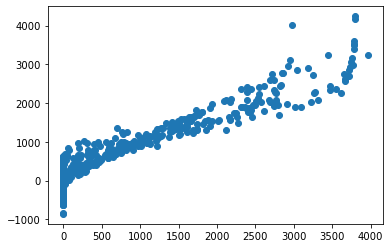

In [14]:
X__train,X__test,y__train,y__test = train_test_split(X,y,test_size=0.3,random_state = 101)
# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.svm import SVR
sc = StandardScaler()
# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
pipe = Pipeline(steps=[('trans',column_trans),('scaler',sc), ('classifier', SVR())])
# creating a dictionary containing potential values of alpha
param_grid = {'classifier__C': [0.1,1, 10, 100, 1000], 'classifier__gamma': [1,0.1,0.01,0.001,0.0001]}
SVR_reg= GridSearchCV(pipe, param_grid, cv=10 )
SVR_reg.fit(X__train,y__train)
# taking the mean of mse for using as an indicator of how good the model is
predictions= SVR_reg.predict(X__test)
print('MAE:', metrics.mean_absolute_error(y__test, predictions))
print('MSE:', metrics.mean_squared_error(y__test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y__test, predictions)))
plt.scatter(y__test,SVR_reg.predict(X__test))

In [15]:
#fill y_test with predictions being used with X_test by using 
#gridsearch algorithm which is currently using gradientboostingregressor
#search = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid, n_jobs=-1,cv = 10)
y_test = SVR_reg.predict(X_test)

In [16]:
#https://machinelearningmastery.com/rfe-feature-selection-in-python/